# Importing necessary libraries

In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# custom lda

In [ ]:
def lda(X, y):
    X_class0, X_class1 = X[y == 0], X[y == 1]
    mu1, mu2 = np.mean(X_class0, axis=0), np.mean(X_class1, axis=0)
    S_w = np.sum([np.outer(x - mu1, x - mu1) for x in X_class0], axis=0) + \
          np.sum([np.outer(x - mu2, x - mu2) for x in X_class1], axis=0)
    w_hat = np.linalg.inv(S_w).dot(mu1 - mu2)
    threshold = np.dot(w_hat.T, (mu1 + mu2) / 2)
    return w_hat, threshold


In [ ]:
def plot_lda(X, y, w_hat, threshold):
    X_class0, X_class1 = X[y == 0], X[y == 1]
    plt.scatter(X_class0[:, 0], X_class0[:, 1], color='blue', label='Class 0')
    plt.scatter(X_class1[:, 0], X_class1[:, 1], color='red', label='Class 1')
    x1_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2_vals = (threshold - w_hat[0] * x1_vals) / w_hat[1]
    plt.plot(x1_vals, x2_vals, color='green')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()


Vector w_hat: [-0.75 -0.75]
Threshold: -5.25


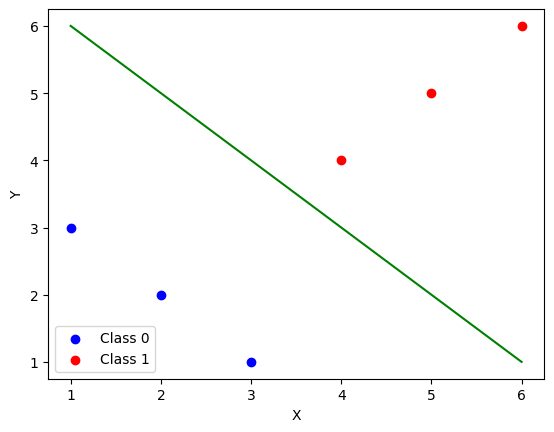

In [ ]:
X = np.array([[1, 3], [2, 2], [3, 1], [4, 4], [5, 5], [6, 6]])
y = np.array([0, 0, 0, 1, 1, 1])

w_hat, threshold = lda(X, y)
print("Vector w_hat:", w_hat)
print("Threshold:", threshold)
plot_lda(X, y, w_hat, threshold)

# logistic regression

Defining necessary functions

In [ ]:
def load_and_preprocess_data(filepath):
    data = pd.read_csv(filepath)
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    return train_test_split(X, y, test_size=0.3, random_state=42)

def apply_lda(X_train, X_test, y_train, y_test):
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    y_pred = lda.predict(X_test)
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }

def tune_logistic_regression(X_train, y_train):
    logreg = LogisticRegression(max_iter=1000)
    param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}
    grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    return grid_search

def evaluate_best_model(grid_search, X_test, y_test):
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }

def plot_grid_search_results(grid_search):
    results_df = pd.DataFrame(grid_search.cv_results_)
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=results_df, x='param_C', y='mean_test_score', hue='param_penalty', marker='o')
    plt.xscale('log')
    plt.xlabel('C (Regularization Parameter)')
    plt.ylabel('Mean Test F1 Score')
    plt.title('Grid Search Results for Logistic Regression')
    plt.show()

Executing our functions

LDA Accuracy: 0.6667
LDA Precision: 0.6667
LDA Recall: 0.6667
LDA F1 Score: 0.6667
Best Logistic Regression Accuracy: 0.6667
Best Logistic Regression Precision: 0.6667
Best Logistic Regression Recall: 0.6667
Best Logistic Regression F1 Score: 0.6667


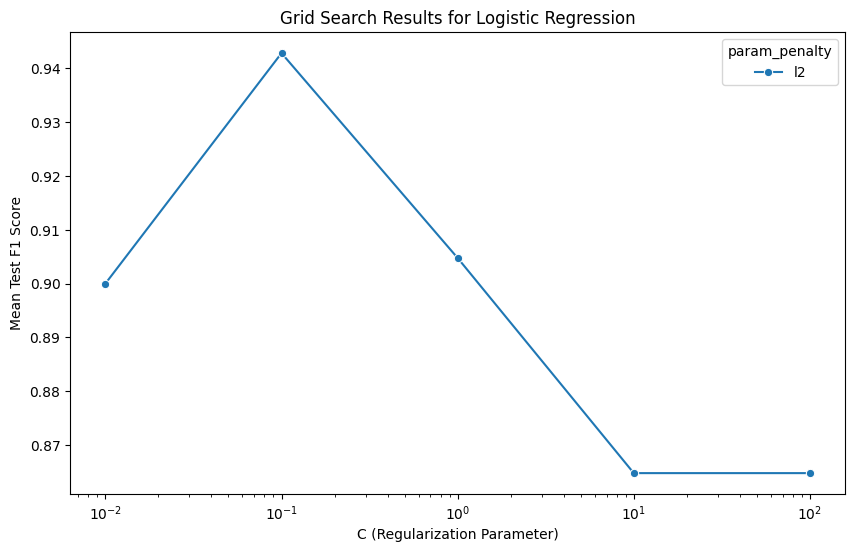

In [ ]:
X_train, X_test, y_train, y_test = load_and_preprocess_data('bin-classifier-2.txt')

lda_metrics = apply_lda(X_train, X_test, y_train, y_test)
print(f'LDA Accuracy: {lda_metrics["accuracy"]:.4f}')
print(f'LDA Precision: {lda_metrics["precision"]:.4f}')
print(f'LDA Recall: {lda_metrics["recall"]:.4f}')
print(f'LDA F1 Score: {lda_metrics["f1"]:.4f}')

grid_search = tune_logistic_regression(X_train, y_train)

best_model_metrics = evaluate_best_model(grid_search, X_test, y_test)
print(f'Best Logistic Regression Accuracy: {best_model_metrics["accuracy"]:.4f}')
print(f'Best Logistic Regression Precision: {best_model_metrics["precision"]:.4f}')
print(f'Best Logistic Regression Recall: {best_model_metrics["recall"]:.4f}')
print(f'Best Logistic Regression F1 Score: {best_model_metrics["f1"]:.4f}')

plot_grid_search_results(grid_search)